# 퍼셉트론 (2)

## 1. 퍼셉트론 구현하기 (XOR 게이트)

### 1) 패키지 참조하기

In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas import DataFrame

from tensorflow.keras.models import Sequential  # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense       # 모델 객체에 학습층을 쌓기 위한 클래스
from tensorflow.keras.optimizers import RMSprop # 옵티마이저 - 다층퍼셉트론 및 분류(로지스틱, 소프트맥스) 전용 옵티마이저
from tensorflow.keras.losses import mse         # 활성화 함수 - 논리연산 및 회귀(단순선형, 다중선형) 전용 활성화 함수

### 2) 데이터셋 준비하기
- 랜덤 시드값 고정

In [2]:
np.random.seed(777)

- 데이터셋 구성
    - `XOR 회로`는 입력값이 동일한 경우 `False`, 입력값이 서로 다른 경우 `True`를 반환한다.

In [3]:
train_x = np.array([[0,0], [1,0], [0,1], [1,1]])
train_y = np.array([[0], [1], [1], [0]])

### 3) 데이터 전처리
> 간단한 데이터이므로 이 예제에서는 수행하지 않는다
- 이 때 결측치 등을 확인할 수 있다
    - `데이터프레임.isna().sum()`
### 4) 탐색적 데이터 분석
- `flatten`: 무조건 1차원으로 풀어버린다

In [4]:
label = train_y.flatten()
df = DataFrame(train_x, label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
0,1,1


### 5) 데이터셋 분할
> 훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 이 예제에서는 진행하지 않는다.

### 6) 모델 개발
- 모델 정의
```python
tf.keras.layers.Dense(units,
                      input_shape = (batch_size, input_dim)
                      activation = None,
                      use_bias=True,
                      kernel_initializer='glorot_uniform',
                      bias_initializer='zeros',
                      kernel_regularizer=None,
                      bias_regularizer=None,
                      activity_regularizer=None,
                      kernel_constraint=None,
                      bias_constraint=None,
                      **kwargs))
```
    - units: 출력 뉴런의 수
    - input_shape: 입력 뉴련의 수
    - activation: 활성화 함수
        - linear : 디폴트 값으로 입력값과 가중치로 계산된 결과 값이 그대로 출력으로 나옵니다
        - sigmoid : 시그모이드 함수로 이진분류(단순로지스틱)에서 출력층에 주로 쓰입니다
        - softmax : 소프트맥스 함수로 다중클래스 분류문제에서 출력층에 주로 쓰입니다.
        - relu: Rectified Linear Unit 함수로 은닉층에서 주로 쓰입니다.

In [5]:
my_model = Sequential()
# 층이 1, 2인 경우 최대/최종 정확도 50%였다
# 층이 8인 경우 최대/최종 정확도 75%였다
# 층이 16, 32인 경우 최대/최종정확도 100%임을 확인

# 첫번째 Dense층
my_model.add(Dense(16, input_shape = (2,), activation = 'relu'))
    # 16 --> 16개를 출력
    # input_shape = (2, ) --> 2개의 입력값을 받음
    # activation = 'relu' --> 선형회귀인 경우 첫번째 활성화 함수는 무조건 relu로 잡는다
        # 이 층의 결과값은 0 아니면 1 즉, 이진분류값

# 중간 Dense층
    # 다 안 쌓아도 중간 층들은 알아서 쌓아준다
    # 여기서는 8, 4, 2의 출력을 가지는 층들이 은닉되어 있다고 말한다 (-> '은닉층')
    # unit 외에 다른 파라미터들은 앞의 층과 동일하게 구성되어 있을 것 (input_shape, activation 등)

# 마지막 Dense층
my_model.add(Dense(1, activation = 'sigmoid'))
    # 1 --> 1개를 출력
    # activation = 'sigmoid' --> 전 층의 결과값이 [0,1] 즉, 이진분류값이기에 활성화함수는 sigmoid 사용 
        # 다항분류일 경우 (예) 입력값이 [0, 1, 2, 3]일 경우) softmax를 사용하면 됨
    # 마지막 층에 어떤 활성화 함수를 사용하느냐에 따라 분석 알고리즘 종류가 결정된다 -> 이 모델에서는 sigmoid로 결정됨
my_model.compile(optimizer = RMSprop(), loss=mse, metrics=['acc'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 학습하기
    - `model.fit()`

In [6]:
my_hist = my_model.fit(train_x, train_y, epochs=500)

result_df = DataFrame(my_hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500


1/1 [==============================] - 0s 205ms/step - loss: 0.2446 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2438 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2432 - acc: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2427 - acc: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2423 - acc: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2419 - acc: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2415 - acc: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2411 - acc: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2408 - acc: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2405 - acc: 0.7500
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2402 - acc: 0.7

,loss,acc
epochs,,
1,0.244589,0.75
2,0.243793,0.50
3,0.243189,0.75
4,0.242691,0.75
5,0.242254,0.75
...,...,...
496,0.118808,1.00
497,0.118556,1.00
498,0.118273,1.00


### 7) 학습 결과 평가
- 학습 결과 시각화

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

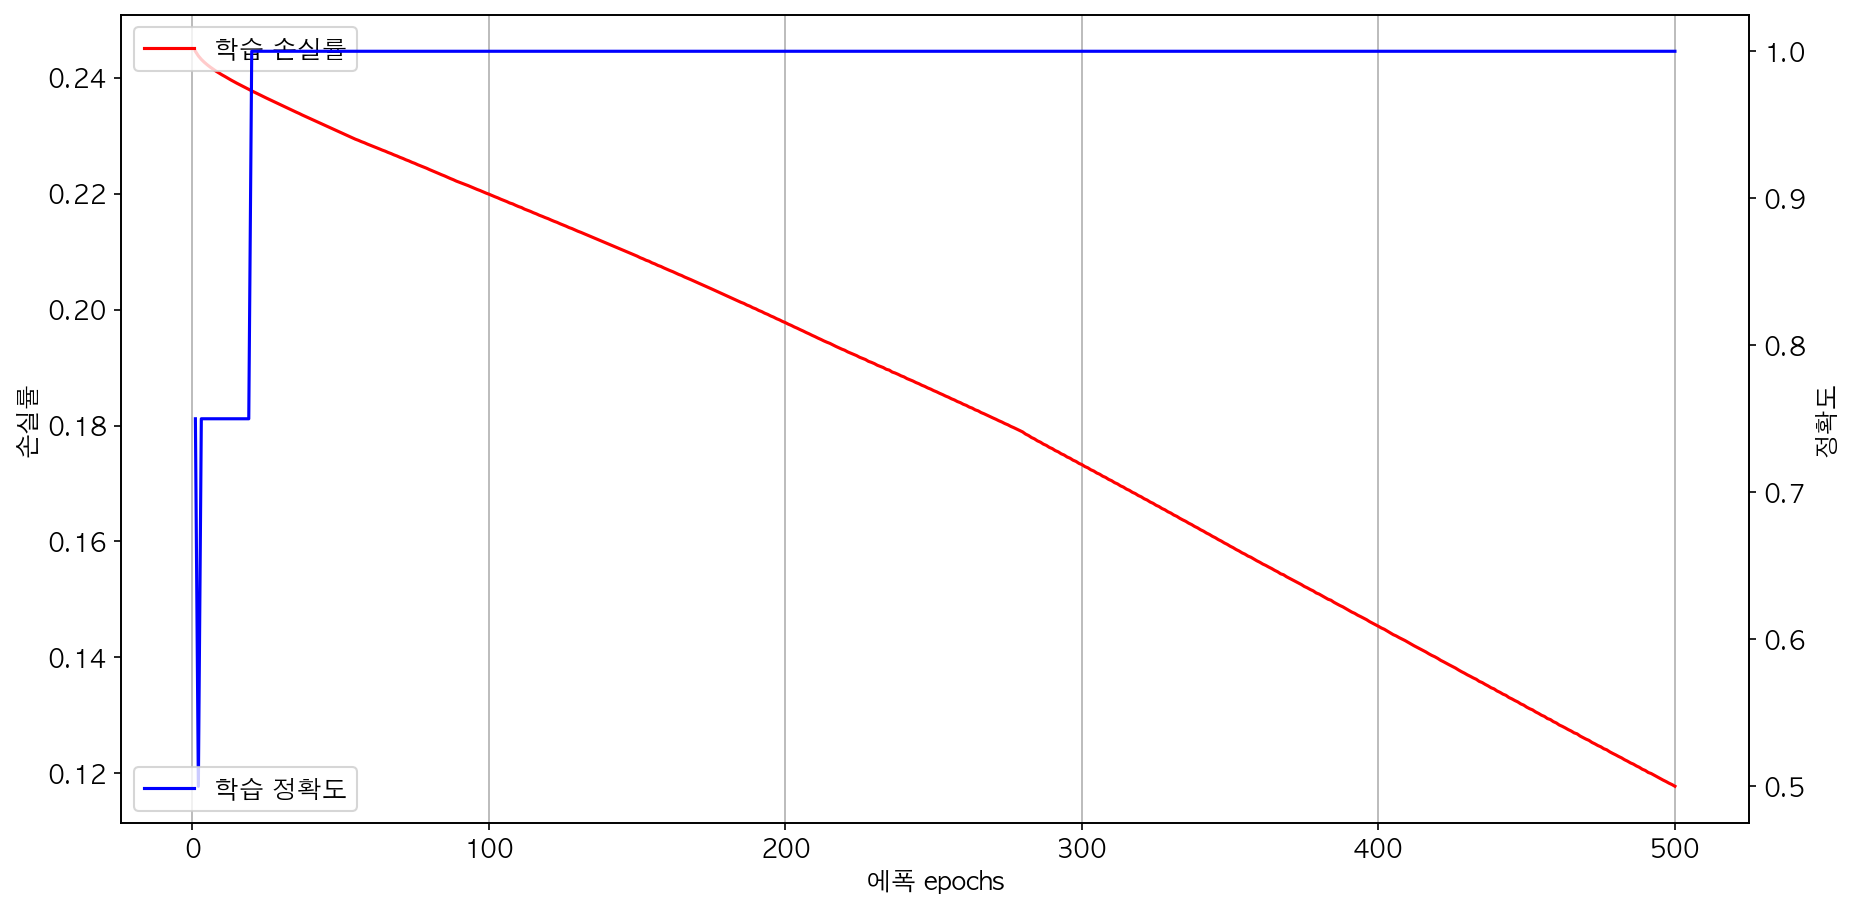

In [7]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12

fig, ax1 = plt.subplots(1,1,figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(x=result_df.index,
             y='loss',
             data=result_df,
             color='red',
             label='학습 손실률',
             ax=ax1)
ax1.set_xlabel('에폭 epochs')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(x=result_df.index,
             y='acc',
             data=result_df,
             color='blue',
             label='학습 정확도',
             ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

- 모델 성능 평가
    - `모델객체.evaluate(독립변수데이터, 종속변수데이터)`

In [8]:
ev = my_model.evaluate(train_x, train_y)
print('손실률: %0.2f, 정확도: %0.2f' % (ev[0], ev[1]))

1/1 [==============================] - 0s 60ms/step - loss: 0.1175 - acc: 1.0000
손실률: 0.12, 정확도: 1.00


- 가중치, 편향 확인
    - `모델객체.get_weights()`

In [9]:
weights = my_model.get_weights()
weights

[array([[-0.584341  ,  0.06946519, -0.24830869, -0.41605532,  0.59229094,
         -0.2961332 ,  0.06132013, -0.534925  , -0.05957961, -0.02279556,
         -0.6334241 ,  0.93436074,  0.53806543,  0.355315  ,  0.40052453,
         -0.15543512],
        [ 0.5860118 , -0.29270062, -0.39547938, -0.26078495, -0.59203637,
         -0.22752711, -0.4413582 , -0.47029892, -0.18789282, -0.43714622,
          0.63419765, -0.23235613, -0.53719103,  0.3548882 ,  0.4004367 ,
         -0.20059952]], dtype=float32),
 array([ 6.9894915e-04,  4.3652132e-01,  0.0000000e+00,  0.0000000e+00,
         3.6102609e-04,  0.0000000e+00, -6.1651941e-02,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  5.2822055e-05, -2.5468853e-03,
         2.2367924e-05, -3.5451904e-01, -3.9786556e-01,  0.0000000e+00],
       dtype=float32),
 array([[ 1.0740006 ],
        [-0.33646068],
        [ 0.370618  ],
        [ 0.3881743 ],
        [ 0.44673988],
        [-0.36981076],
        [-0.21305531],
        [-0.18427691

In [10]:
# 2차원 배열 - 입력층과 은닉층을 연결하는 가중치
print(weights[0].shape)

# 1차원 배열 - 은닉층의 편향
print(weights[1].shape)

# 2차원 배열 - 은닉층와 출력층을 연결하는 가중치
print(weights[2].shape)

# 1차원 배열 - 출력층의 편향
print(weights[3].shape)

(2, 16)
(16,)
(16, 1)
(1,)


### 8) 학습 결과 적용

In [11]:
r = my_model.predict(train_x)
df['예측값'] = r.reshape(-1).round()
df

1/1 [==============================] - 0s 37ms/step


,x1,x2,예측값
y,,,
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
0,1,1,0.0
